<h1>
<center>CFRM 521, Spring 2020</center>
</h1>

<h1>
<center>Qiyu Wang</center>
</h1>

<h1>
<center>Project</center>
</h1>

# Introduction

This paper analyzes the housing price data of Kings County, using six algorithms to train the data. In this experiment, I only use the original dataset downloaded from kaggle, not the program in kaggle. The key point of this experiment is to understand and use three machine learning algorithms, that is, multiple linear regression, ridge regression and neural network algorithm.


# Experimental hypothesis

In this experiment, we have to do the regression task. The most commonly used algorithm of regression task is linear regression algorithm, which finds the best function matching of data by minimizing the sum of squares of errors. By using linear regression algorithm, the unknown data can be easily predicted and the sum of square error between the obtained data and the actual data can be minimized. However, the most linear regression has some known shortcomings, so some researchers put forward an improved ridge regression algorithm. In addition, neural network algorithm is also used in the experiment. The principle and program of neural network are more complex than linear regression and ridge regression algorithm, so the experimental results should be better than these two algorithms. MSE, RMSE and R2_score were used as evaluation indexes.

 The project goes into 4 parts:
 1. Data preprocessing
 2. Dimension reduction (two method: 1. based on correlation. 2. based on PCA tools)
 3. Explain the methods 
 4. Experiment (use 6 different algorithms to train the model and compare the result )
 5. Compare the models

# Data preprocessing

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. The dataset contains 21 columns in total, such as sales time, price, number of bedrooms, number of bathrooms, habitable area, floors, etc.

In [74]:
# import librarys 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import learning_curve
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [5]:
# read dataset 
data = pd.read_csv('./kc_house_data.csv')

In [6]:
print('The dataset samples:')
data.head()

The dataset samples:


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
row, cols = data.shape
print('The data contains %d rows and %d columns.' % (row, cols))

The data contains 21613 rows and 21 columns.


In [8]:
print('The dataset columns:')
data.columns

The dataset columns:


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Check missing values:

In [9]:
df=data.isnull()
df.groupby(["id"]).count()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
False,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613


Based on the result, there's no missing value in the dataframe.

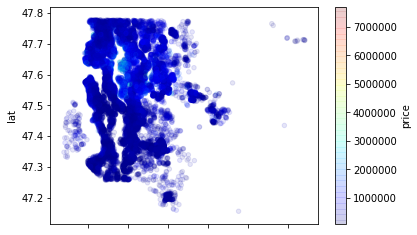

In [10]:
data.plot(kind="scatter", x="long", y="lat", alpha=0.1, c="price", cmap=plt.get_cmap("jet"), colorbar=True)

In the experiment, Price is the response variables. And among the 20 predictors, ID is totally inrelevant, and Date is also inrelevant because the data was all with in one year. So we take them out.

Delete Id and Date from data because predict the price not use these attibute.

In [11]:
# delete id and date
del data['id']
del data['date']

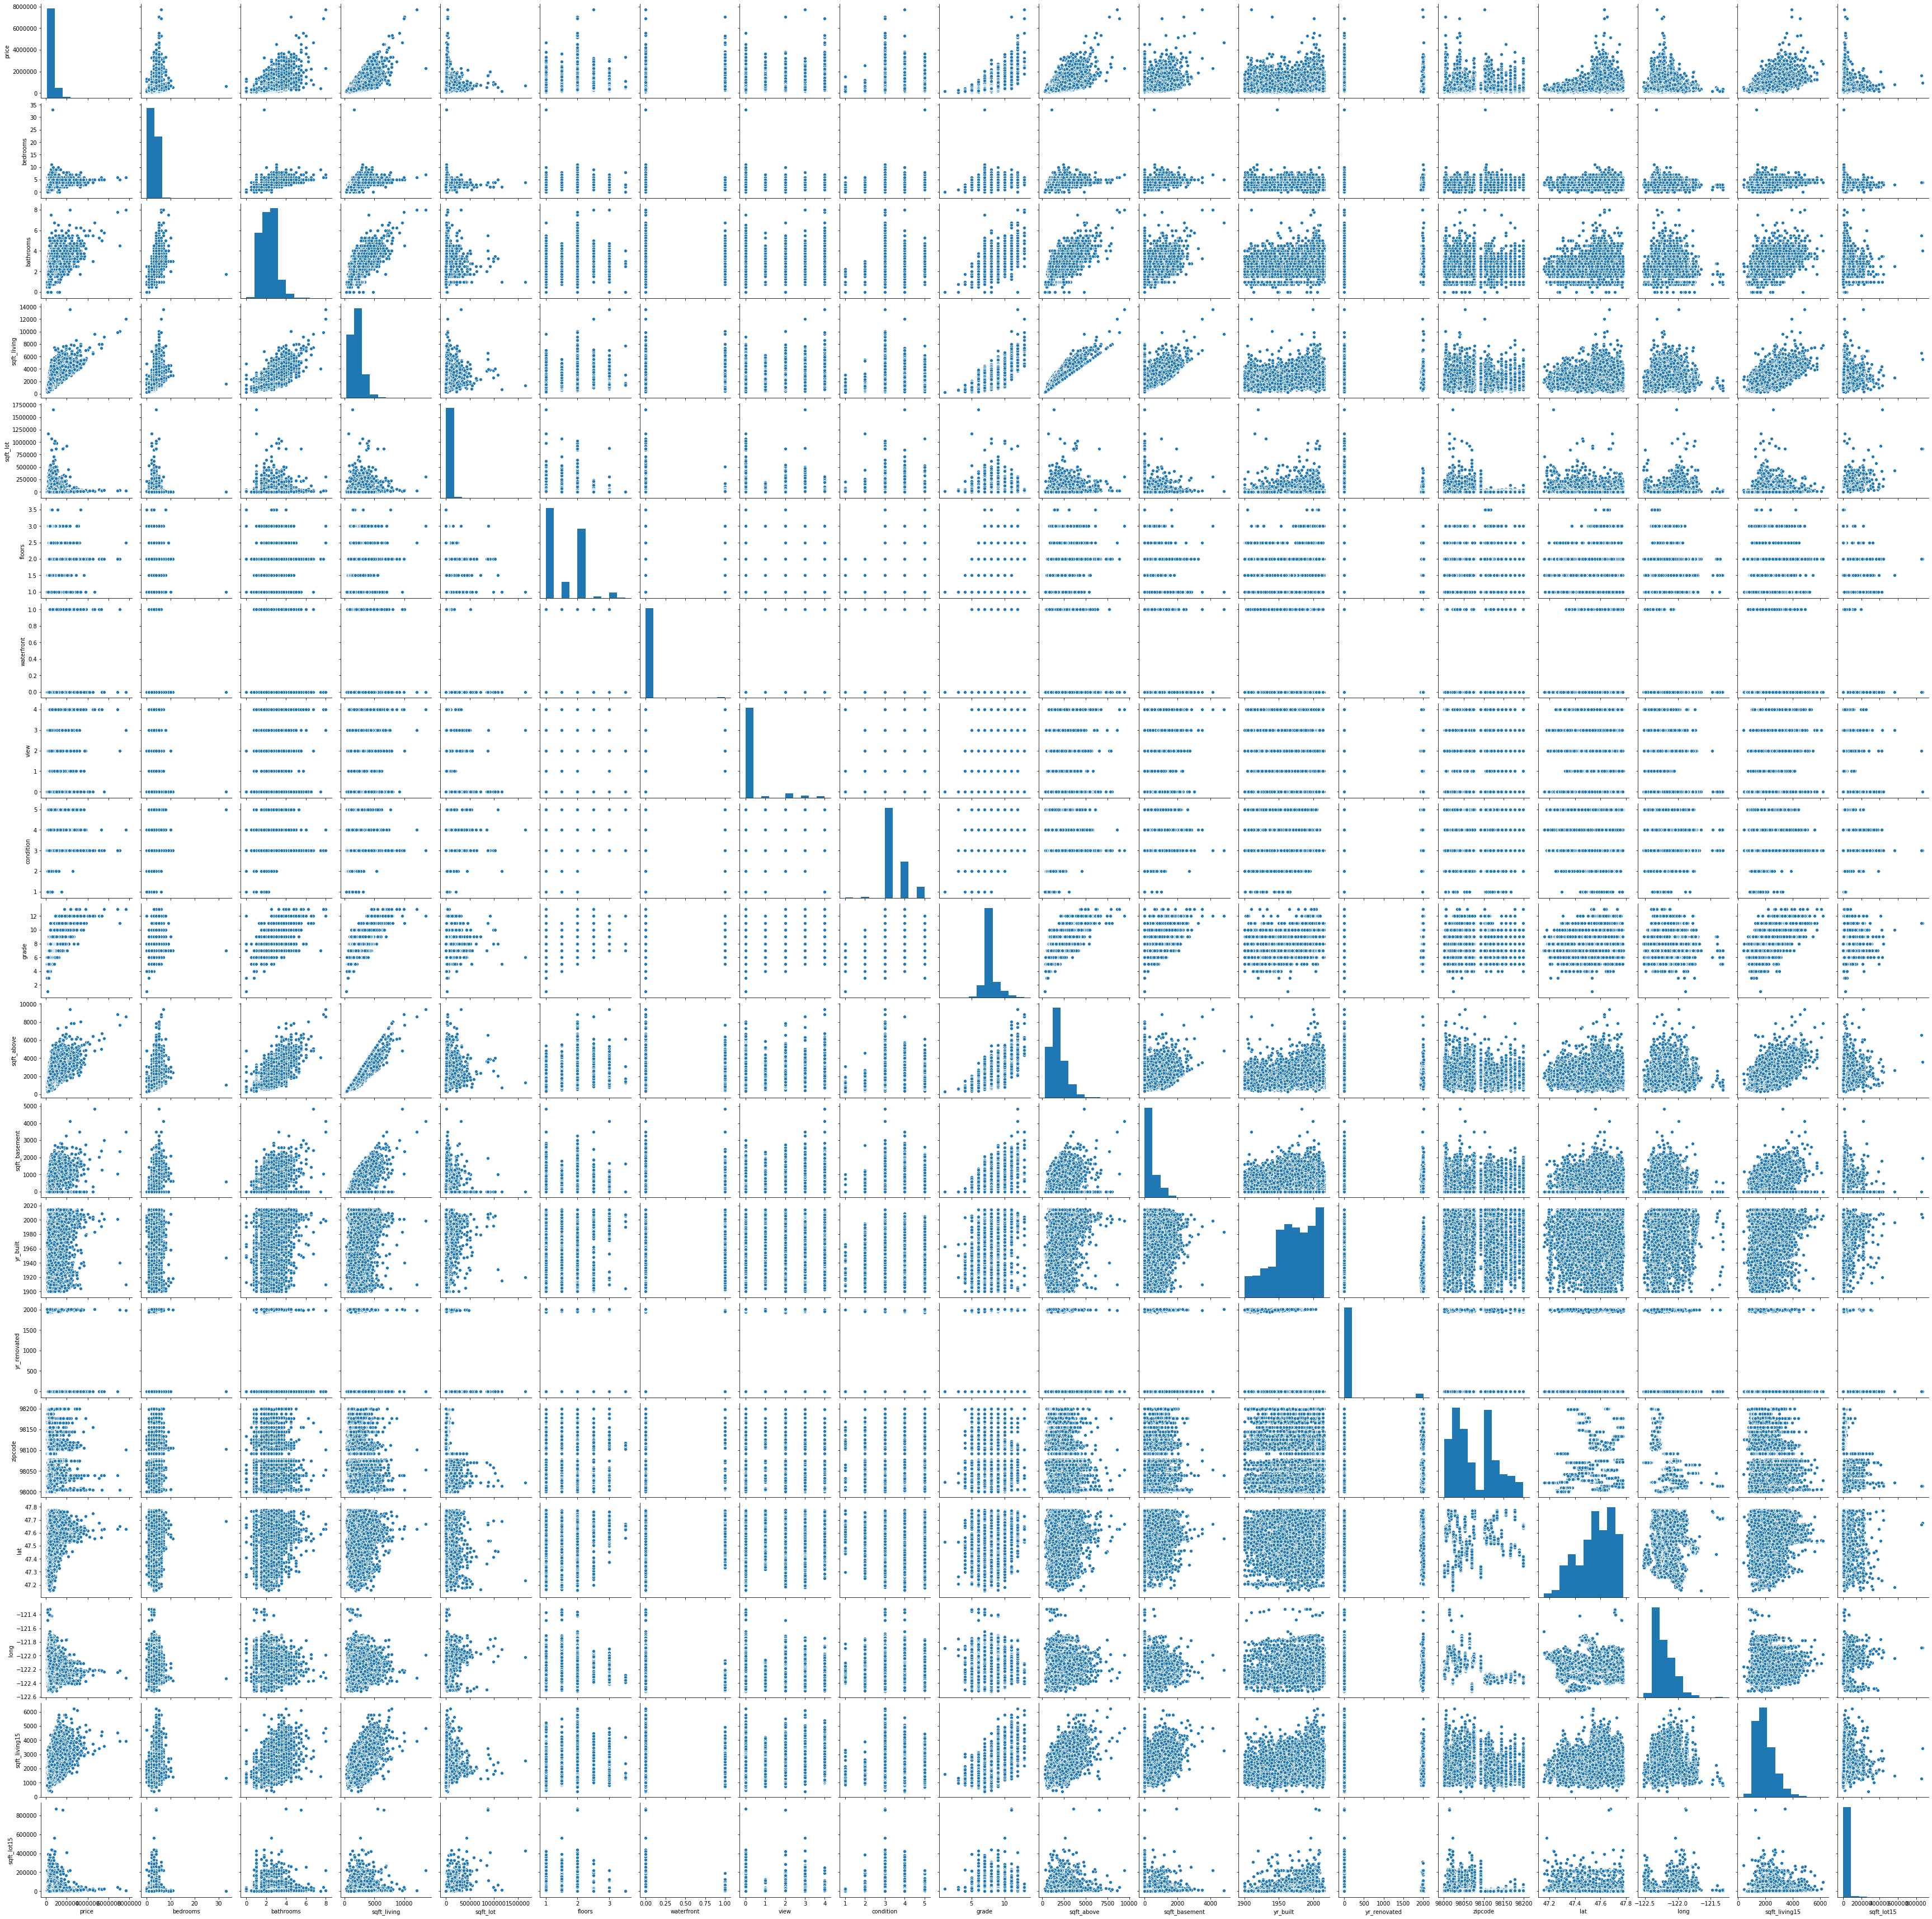

In [12]:
sns.pairplot(data)

Split the price from data,

In [13]:
# split price
price = data['price']

# delete price from data
del data['price']

View the modified data format，

In [14]:
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
price.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

You can see that the price and other attributes are separated from the data. Now you can use the algorithm provided by sklearn to train the data, using price as y and other attributes as X.

## Attribute Selection Based on Correlation

Attribute selection, next use the method provided by pandas to check the correlation coefficient between attributes. The value of correlation coefficient is [- 1, 1]. When the correlation coefficient is less than 0, the two attributes are negatively correlated. When the correlation coefficient is greater than 0, the two attributes are positively correlated. When the correlation coefficient is 0, the two attributes are irrelevant. So what we are looking for now is the attribute with correlation. Whether it is positive correlation or negative correlation, remove one of the attributes, because they play the same role in the regression task.

In [16]:
data.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248
sqft_above,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,0.167649,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.023285,-0.261190,-0.000816,0.343803,0.731870,0.194050


Looking at the correlation coefficient table, we can see that,

- the correlation coefficient between sqft_living and bathrooms was 0.754665
- the correlation coefficient between sqft_living and grade was 0.762704
- the correlation coefficient between sqft_living and sqft_living15 was 0.756420
- the correlation coefficient between sqft_living15 and grade was 0.713202
- the correlation coefficient between sqft_lot15 and sqft_lot was 0.718557
- the correlation coefficient between sqft_living15 and sqft_above was 0.731870

Because of the strong correlation between these attributes, one of them needs to be deleted. Need to remove from data sqft_living, sqft_living15 and sqft_lot15.

In [17]:
# delete the above attribute from data
del data['sqft_living']
del data['sqft_living15']
del data['sqft_lot15']

Check the current format of data,

In [18]:
data.head()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,3,1.00,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,3,2.25,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,2,1.00,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,4,3.00,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,3,2.00,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


Correlation visualization of data,

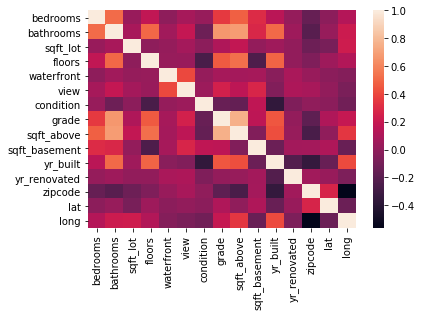

In [19]:
corr = data.corr()
sns.heatmap(corr)
plt.show()

Line box diagram of observation data，

## Attribute Selection Based on PCA

PCA is an effective dimension reduction method. Here, I also try to use PCA to furhter reduce the dimension of data, and then check the correlation between various attributes. 

In the following method, we will compare the performance of the algorithm on the original data and PCA dimension reduced data, so as to verify the performance of PCA algorithm.

In [20]:
pca = PCA(n_components=10)

In [21]:
pca_data = pca.fit_transform(data)

In [22]:
pd.DataFrame(pca_data).corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000e+00,8.288920e-17,-9.596097e-17,2.771736e-17,2.643622e-17,1.569387e-17,4.162831e-17,-9.734909e-18,-3.805182e-18,-3.580340e-17
1,8.288920e-17,1.000000e+00,-1.152182e-16,-7.693085e-17,-8.502291e-17,6.436064e-19,4.639201e-16,-8.260214e-17,-8.246293e-18,-4.177087e-17
2,-9.596097e-17,-1.152182e-16,1.000000e+00,-4.378477e-16,-9.183563e-18,-1.106679e-16,3.702009e-17,5.202860e-17,-6.410259e-17,8.045897e-18
3,2.771736e-17,-7.693085e-17,-4.378477e-16,1.000000e+00,-1.060068e-16,6.011369e-17,-1.465035e-16,8.027934e-17,4.942360e-18,-2.613392e-17
4,2.643622e-17,-8.502291e-17,-9.183563e-18,-1.060068e-16,1.000000e+00,-1.220626e-16,3.955407e-18,8.772216e-17,-4.006209e-17,-7.364656e-17
5,1.569387e-17,6.436064e-19,-1.106679e-16,6.011369e-17,-1.220626e-16,1.000000e+00,-7.159857e-17,8.938912e-17,-3.842742e-17,3.678536e-17
6,4.162831e-17,4.639201e-16,3.702009e-17,-1.465035e-16,3.955407e-18,-7.159857e-17,1.000000e+00,2.367069e-16,-2.242097e-17,6.062769e-17
7,-9.734909e-18,-8.260214e-17,5.202860e-17,8.027934e-17,8.772216e-17,8.938912e-17,2.367069e-16,1.000000e+00,-6.100871e-18,-1.685464e-16
8,-3.805182e-18,-8.246293e-18,-6.410259e-17,4.942360e-18,-4.006209e-17,-3.842742e-17,-2.242097e-17,-6.100871e-18,1.000000e+00,-4.008932e-16
9,-3.580340e-17,-4.177087e-17,8.045897e-18,-2.613392e-17,-7.364656e-17,3.678536e-17,6.062769e-17,-1.685464e-16,-4.008932e-16,1.000000e+00


From the correlation table, we can see that the correlation between the attributes of the data processed by PCA is close to 0. It can be said that there is no correlation between these attributes, and the dimensionality reduction effect is very good.

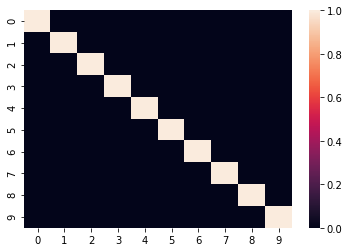

In [23]:
corr = pd.DataFrame(pca_data).corr()
sns.heatmap(corr)
plt.show()

It is also obvious from the thermodynamic diagram that there is almost no relationship between the attributes.

Data normalization, the purpose of data normalization is to limit all data within the agreed range, speed up the convergence of the model, and avoid the decisive influence of attribute value of a certain attribute on the model. Normalization is very important for linear model.

The normalization method provided by sklearn is used to normalize the data,

In [24]:
scaler = preprocessing.StandardScaler()

The same normalization parameters are used for test set and training set,

In [25]:
data = scaler.fit_transform(data)
pca_data = scaler.fit_transform(pca_data)

Check the normalized data,

In [26]:
data[0:5]

array([[-0.39873715, -1.44746357, -0.22832133, -0.915427  , -0.08717263,
        -0.30575946, -0.62918687, -0.55883575, -0.73470764, -0.65868104,
        -0.54489777, -0.21012839,  1.87015159, -0.35257175, -0.30607896],
       [-0.39873715,  0.1756067 , -0.18988538,  0.93650577, -0.08717263,
        -0.30575946, -0.62918687, -0.55883575,  0.46084084,  0.2451414 ,
        -0.6810785 ,  4.7466776 ,  0.87956753,  1.16156823, -0.74634143],
       [-1.47395936, -1.44746357, -0.12329847, -0.915427  , -0.08717263,
        -0.30575946, -0.62918687, -1.40958711, -1.22983377, -0.65868104,
        -1.29389179, -0.21012839, -0.9333882 ,  1.28353661, -0.13565477],
       [ 0.67648506,  1.14944885, -0.2440144 , -0.915427  , -0.08717263,
        -0.30575946,  2.44429394, -0.55883575, -0.89169885,  1.39751501,
        -0.20444594, -0.21012839,  1.08516045, -0.28328794, -1.271816  ],
       [-0.39873715, -0.14900736, -0.16965339, -0.915427  , -0.08717263,
        -0.30575946, -0.62918687,  0.29191561, 

# Experimental method

In the data preprocessing part, the useless attributes are deleted, the data is divided into training set and test set, and the data is normalized. Next, several different algorithms are used to train the data.



### Linear regression model

In the multivariate linear model, suppose there are n independent variables, the function expression is as follows,
$$\hat y = w_0 + w_1x_1 + w_2x_2 + w_3x_3 + \dots + w_nx_n$$
Define the loss function,
$$loss = \frac{1}{n} \sum_{i = 1}^{n}(y^{(i)} - \hat y^{(i)})^2$$
The minimum loss function can be used to solve the parameters, which can be transformed into matrix expression and easy to calculate.

Define weight，
$$W=(w_0, w_1, w_2, w_3, \dots, w_n)^T$$

Define data matrix $X$
$$X^{(i)} = (X^{(i)}_0, X^{(i)}_1, X^{(i)}_2, X^{(i)}_3, \dots, X^{(i)}_n), \ X^{(i)}_0 = 1$$

So the predict value is，
$$\hat y^{(i)}= X^{(i)} \cdot W$$

Loss function,
$$loss = \sum_{i = 1}^{n}(y^{(i)} - \hat y^{(i)})^2$$
$$loss = (y - X\cdot W)^T(y - X \cdot W)$$
Finally, the gradient descent method is used to solve the parameters,
$$W = (X^TX)^{-1}X^Ty$$

Next, we use the program to implement the above algorithm,

In [67]:
import numpy as np
from sklearn.metrics import r2_score

class LinearRegression:
  def __init__(self):
    '''Initialize model'''
    self.coef_ = None
    self.interception_ = None
    self._theta = None

  def fit(self, X_train, y_train):
    '''Using data to train models'''
    X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
    self._theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
    self.interception_ = self._theta[0]
    self.coef_ = self._theta[1:]
    
  def predict(self,X_predict):
    X_b = np.hstack([np.ones((len(X_predict),1)),X_predict])
    return X_b.dot(self._theta)

  def score(self,X_test,y_test):
    '''Determine the accuracy of the current model based on the test data set'''
    y_predict = self.predict(X_test)
    return r2_score(y_test,y_predict)
  
  def __repr__(self):
    return 'LinearRegression()'

### Ridge regression
#### Algorithmic theory

When there is multicollinearity between independent variables, the variance of regression coefficient estimation is very large, and the estimation value is very unstable. At this time, small changes in the model or data may cause large changes in coefficient estimation and have a greater impact on the predicted value. Ridge regression was proposed by Hoerl and Kennard in 1970. It is a biased estimation and an improvement on the least square estimation.

The objective function of ridge regression is as follows,

$$
J(W) = ||y - X\cdot W||_2^2 + \lambda ||W||_2^2
$$

From the formula point of view, ridge regression is to add constraints to w on the basis of least square regression, so as to avoid the parameter W becoming large. Ridge regression is a supplement to the least square regression. It loses the unbiasedness in exchange for high numerical stability and high accuracy.

Here is the formula derivation of ridge regression,

\begin{align}
J(W)& = ||y - X\cdot W||_2^2  + \lambda ||w||_2^2 \\
  & = (y - XW)^T(y - XW) + \lambda W^TW \\
  & = y^Ty - y^TXW - W^TX^Ty = W^TX^TXW + \lambda W^TW \\
\end{align}

let, 
$$
\frac{\partial J(W)}{\partial W} = 0 \\
0 - X^Ty - X^Ty + 2X^TXW + 2 \lambda W = 0 \\
W = (X^TX + \lambda I)^{-1}X^Ty
$$

The ridge regression algorithm is written by using the derived formula,

In [68]:
import numpy as np
from sklearn.metrics import r2_score

class RidgeRegression:
  def __init__(self):
    '''Initialize model'''
    self.coef_ = None
    self.interception_ = None
    self._theta = None

  def fit(self, X_train, y_train, lambda_value):
    '''Using data to train models'''
    X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
    I = np.identity(X_b.shape[1]) * lambda_value
    self._theta = np.linalg.inv(X_b.T.dot(X_b) + I).dot(X_b.T).dot(y_train)
    self.interception_ = self._theta[0]
    self.coef_ = self._theta[1:]
    
  def predict(self, X_predict):
    X_b = np.hstack([np.ones((len(X_predict),1)),X_predict])
    return X_b.dot(self._theta)

  def score(self, X_test, y_test):
    '''Determine the accuracy of the current model based on the test data set'''
    y_predict = self.predict(X_test)
    return r2_score(y_test,y_predict)
  
  def __repr__(self):
    return 'RidgeRegression()'

## Evaluation method
The validation methods of linear regression often use MSE, RMSE, R2_score. Different methods have different evaluation methods for the model.

The mathematical formula of MSE is as follows,

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y^{(i)} - \hat y^{(i)})^2
$$

The mathematical formula of RMSE is as follows,

$$
RMSE = \sqrt {\frac{1}{n} \sum_{i=1}^{n} (y^{(i)} - \hat y^{(i)})^2}
$$

The mathematical formula of R2_score is as follows,

$$
R^2 = 1 - \frac{\sum_i (y^{(i)} - \hat y^{(i)})^2}{\sum_i (y^{(i)} - \bar y^{(i)})^2}
$$

Next, this evaluation method will be used to evaluate the performance of the algorithm.

In [69]:
def rmse(mse):
    return np.sqrt(mse)

## Linear regression method

First, the simplest linear regression algorithm is used to train the data. Linear regression is the most basic algorithm in regression method, which is simple in theory and easy to understand, but its performance is not very good. Sklearn provides the **LinearRegersession** class to train the data.

### Learning curve analysis

Create a linear regression object,

In [75]:
model_linear_regression = LinearRegression()
train_sizes, train_scores, test_scores  = learning_curve(model_linear_regression, data, price, cv=5, train_sizes=np.linspace(0.001, 1, 20))

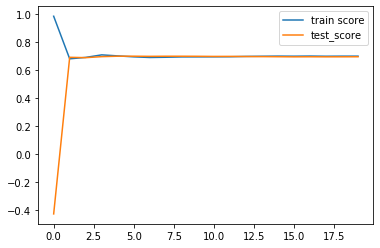

In [76]:
plt.plot(train_scores[:, 0], label='train score')
plt.plot(test_scores[:, 0], label='test_score')
plt.legend()

In the learning curve, the number of cross validation is set as 5. From the above learning curve, it can be seen that the fitting effect on test and training is not bad.

### Train model with data processed based on correlation.

We first use the algorithm on the data without PCA dimension reduction,

In [77]:
x_train, x_test, y_train, y_test = train_test_split(data, price, test_size=0.2, random_state=0)
model_linear_regression.fit(x_train, y_train)
pred = model_linear_regression.predict(x_test)
lr_mse = mean_squared_error(pred, y_test)
lr_rmse = rmse(lr_mse)
lr_r2 = r2_score(y_test, pred)

print("The LinearRegression prediction MSE: %f, RMSE: %f, R2_score: %f" % (lr_mse, lr_rmse, lr_r2))

The LinearRegression prediction MSE: 36214088766.726089, RMSE: 190299.996760, R2_score: 0.695486


View model parameters,

In [78]:
model_linear_regression.coef_

array([-31912.12884926,  30088.63687908,  -2093.06224135,   2999.01587343,
        51965.68812472,  42070.7891945 ,  16461.65229193, 115230.88677076,
       160805.83385662,  69861.46247665, -77165.53338695,   7421.43546688,
       -31569.26321533,  84467.93568072, -30261.45786326])

### Train model with pca data. 

In [79]:
x_train, x_test, y_train, y_test = train_test_split(pca_data, price, test_size=0.2, random_state=0)
model_linear_regression.fit(x_train, y_train)
pca_pred = model_linear_regression.predict(x_test)
lr_mse = mean_squared_error(pca_pred, y_test)
lr_rmse = rmse(lr_mse)
lr_r2 = r2_score(y_test, pca_pred)

print("The LinearRegression prediction MSE: %f, RMSE: %f, R2_score: %f" % (lr_mse, lr_rmse, lr_r2))

The LinearRegression prediction MSE: 43240146461.618317, RMSE: 207942.651858, R2_score: 0.636406


Although the correlation between the attributes of PCA dimension reduction data is very small, from the above experimental results, it can be seen that the model trained with PCA data is not as good as the model trained with original data.

### Visualization of results

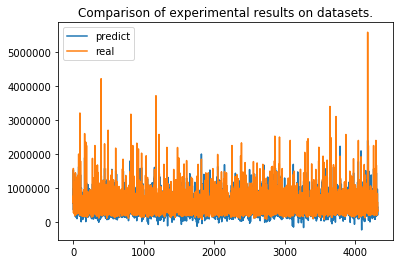

In [80]:
plt.title('Comparison of experimental results on datasets.')
plt.plot(pred, label='predict')
plt.plot(np.array(y_test), label='real')
plt.legend()

By visualizing the real value and the predicted value, it is found that the predicted result is still good.

## Ridge regression method

When there is multicollinearity between independent variables, the variance of regression coefficient estimation is very large, and the estimation value is very unstable. At this time, small changes in the model or data may cause large changes in coefficient estimation and have a greater impact on the predicted value. Ridge regression was proposed by Hoerl and Kennard in 1970. It is a biased estimation and an improvement on the least square estimation.

The objective function of ridge regression is as follows,

$$
J(W) = ||y - X\cdot W||_2^2 + \lambda ||W||_2^2
$$

From the formula point of view, ridge regression is to add constraints to w on the basis of least square regression, so as to avoid the parameter W becoming large. Ridge regression is a supplement to the least square regression. It loses the unbiasedness in exchange for high numerical stability and high accuracy.

Next, use the ridge regression algorithm to train the data.

### Learning curve analysis

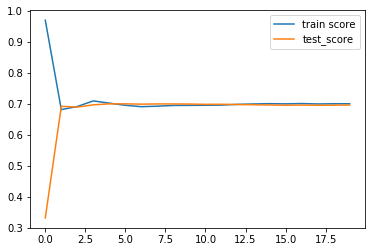

In [81]:
ridge = Ridge()
train_sizes, train_scores, test_scores  = learning_curve(ridge, data, price, cv=5, train_sizes=np.linspace(0.001, 1, 20))

plt.plot(train_scores[:, 0], label='train score')
plt.plot(test_scores[:, 0], label='test_score')
plt.legend()

From the learning curve, it can be seen that with the increase of training set, the training score gradually decreases, the test score gradually increases, and finally the two gradually merge together.

### Train model with data processed based on correlation.

Train the data,

In [82]:
x_train, x_test, y_train, y_test = train_test_split(data, price, test_size=0.2, random_state=0)
ridge.fit(x_train, y_train)
pred = ridge.predict(x_test)
lr_mse = mean_squared_error(pred, y_test)
lr_rmse = rmse(lr_mse)
lr_r2 = r2_score(y_test, pred)

print("The RidgeRegression prediction MSE: %f, RMSE: %f, R2_score: %f" % (lr_mse, lr_rmse, lr_r2))

The RidgeRegression prediction MSE: 36213780372.257042, RMSE: 190299.186473, R2_score: 0.695489


To view the parameters of ridge regression,

In [83]:
ridge.coef_

array([-31900.66854806,  30095.82608999,  -2090.60889451,   2999.88075777,
        51964.00547719,  42073.49597429,  16462.80420134, 115232.86699741,
       160779.62461409,  69851.21451959, -77157.99583455,   7423.54581682,
       -31563.27534994,  84464.07969755, -30256.16015021])

### Train model with pca data.

In [84]:
x_train, x_test, y_train, y_test = train_test_split(pca_data, price, test_size=0.2, random_state=0)
ridge.fit(x_train, y_train)
pca_pred = ridge.predict(x_test)
lr_mse = mean_squared_error(pca_pred, y_test)
lr_rmse = rmse(lr_mse)
lr_r2 = r2_score(y_test, pca_pred)

print("The RidgeRegression prediction MSE: %f, RMSE: %f, R2_score: %f" % (lr_mse, lr_rmse, lr_r2))

The RidgeRegression prediction MSE: 43239688082.495735, RMSE: 207941.549678, R2_score: 0.636410


In the ridge regression algorithm, PCA data is still not as good as the performance of the original data set, it should be the data transformed by PCA algorithm lost a lot of information of the data.

### Grid Search for Ridge

In [85]:
x_train, x_test, y_train, y_test = train_test_split(data, price, test_size=0.2, random_state=0)

param_grid = [{'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

skridge = Ridge()
grid_search = GridSearchCV(skridge, param_grid, cv=5,
                           return_train_score=True,
                           n_jobs=-1)

grid_search.fit(x_train, y_train)
pred = grid_search.predict(x_test)
skr_mse = mean_squared_error(pred, y_test)
skr_rmse = rmse(skr_mse)
skr_r2 = r2_score(y_test, pred)

print("The best alpha:", grid_search.best_params_)
print("The RidgeRegression prediction MSE: %f, RMSE: %f, R2_score: %f" % (skr_mse, skr_rmse, skr_r2))

The best alpha: {'alpha': 0.9}
The RidgeRegression prediction MSE: 36213811175.799759, RMSE: 190299.267407, R2_score: 0.695488


### Visualization of results

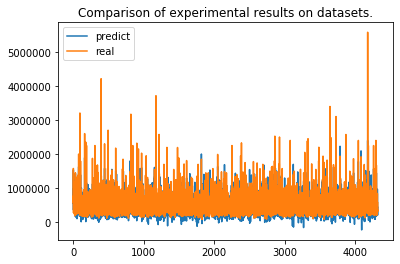

In [86]:
plt.title('Comparison of experimental results on datasets.')
plt.plot(pred, label='predict')
plt.plot(np.array(y_test), label='real')
plt.legend()

It can be seen from the results that the difference between the results of ridge regression and linear regression is not very big. This is mainly because ridge regression needs to set a super parameter manually. In my previous algorithm, the default super parameter is used. Next, use the grid search method to find the optimal super parameter.

It can be seen that the best super parameter found by grid search is 0.9, and the test result is consistent with the result of ridge's default parameter.

## Neural network algorithm

### Train model with data processed based on correlation.

Create a new MLPRegressor object,

In [87]:
mlp = MLPRegressor((100, 50), max_iter=200)
x_train, x_test, y_train, y_test = train_test_split(data, price, test_size=0.2, random_state=0)

mlp.fit(x_train, y_train)
pred = mlp.predict(x_test)

mlp_mse = mean_squared_error(pred, y_test)
mlp_rmse = rmse(mlp_mse)
mlp_r2 = r2_score(y_test, pred)

print("The NeuralNetworkRegression  prediction MSE: %f, RMSE: %f, R2_score: %f" % (mlp_mse, mlp_rmse, mlp_r2))

The NeuralNetworkRegression  prediction MSE: 28161682537.338177, RMSE: 167814.428871, R2_score: 0.763197


C:\Users\10331\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Train model with pca data.

In [88]:
x_train, x_test, y_train, y_test = train_test_split(pca_data, price, test_size=0.2, random_state=0)
mlp.fit(x_train, y_train)
pca_pred = mlp.predict(x_test)
mse = mean_squared_error(pca_pred, y_test)
_rmse = rmse(lr_mse)
r2 = r2_score(y_test, pca_pred)

print("The NeuralNetworkRegression prediction MSE: %f, RMSE: %f, R2_score: %f" % (mse, _rmse, r2))

The NeuralNetworkRegression prediction MSE: 39345714631.813972, RMSE: 207941.549678, R2_score: 0.669153


C:\Users\10331\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Visualization of results

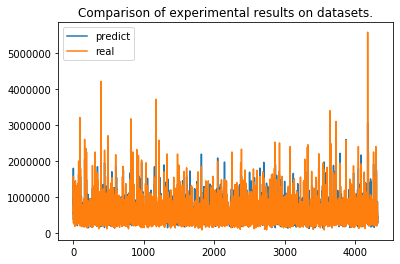

In [89]:
plt.title('Comparison of experimental results on datasets.')
plt.plot(pred, label='predict')
plt.plot(np.array(y_test), label='real')
plt.legend()

From the result of the model, the result of neural network is better than that of linear regression and ridge regression. This is because the neural network is a nonlinear model, which can better fit the data.

## Random Forest Regressor

### Learning Curve 

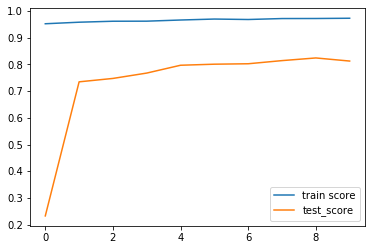

In [90]:
rfr = RandomForestRegressor(n_estimators=10)
train_sizes, train_scores, test_scores  = learning_curve(rfr, data, price, cv=2, train_sizes=np.linspace(0.001, 1, 10))

plt.plot(train_scores[:, 0], label='train score')
plt.plot(test_scores[:, 0], label='test_score')
plt.legend()

From the learning curve, it can be seen that the model has achieved better performance in the training set and better performance in the test set than linear regression and ridge regression, but the model still shows under fitting, which may be caused by improper super parameter settings. I will use grid search to find the optimal super parameter below.

### Train the model with data processed based on correlation.

Create a new RandomForestRegressor object,

In [91]:
rfr = RandomForestRegressor(n_estimators=10)

x_train, x_test, y_train, y_test = train_test_split(data, price, test_size=0.2, random_state=0)

rfr.fit(x_train, y_train)
pred = rfr.predict(x_test)

mse = mean_squared_error(pred, y_test)
_rmse = rmse(mse)
r2 = r2_score(y_test, pred)

print("The RandomForestRegressor prediction MSE: %f, RMSE: %f, R2_score: %f" % (mse, _rmse, r2))

The RandomForestRegressor prediction MSE: 17031898122.360897, RMSE: 130506.314492, R2_score: 0.856784


The R2 score of random forest regression is 0.84, which is better than the previous algorithms. This algorithm has a very important super parameter n_ The number of regressors is determined by the estimator. Next, the best super parameters are explored through grid search.

### Grid search for RandomForestRegressor to find best n_estimators

In [92]:
x_train, x_test, y_train, y_test = train_test_split(data, price, test_size=0.2, random_state=0)

param_grid = [{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400]}]

rfr = RandomForestRegressor()
grid_search = GridSearchCV(rfr, param_grid, cv=2,
                           return_train_score=True,
                           n_jobs=-1)

grid_search.fit(x_train, y_train)
pred = grid_search.predict(x_test)
rfr_mse = mean_squared_error(pred, y_test)
rfr_rmse = rmse(rfr_mse)
rfr_r2 = r2_score(y_test, pred)

print("The best alpha:", grid_search.best_params_)
print("The RandomForestRegressor prediction MSE: %f, RMSE: %f, R2_score: %f" % (rfr_mse, rfr_rmse, rfr_r2))

The best alpha: {'n_estimators': 80}
The RandomForestRegressor prediction MSE: 15547392943.000731, RMSE: 124689.185349, R2_score: 0.869266


It can be seen from the results that when the number of learners is 80, the model can get the best performance. At this time, R2 score is 0.87, which is the current highest value.

### Train the model with pca data.

In [93]:
x_train, x_test, y_train, y_test = train_test_split(pca_data, price, test_size=0.2, random_state=0)

rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(x_train, y_train)
pca_pred = rfr.predict(x_test)

mse = mean_squared_error(pca_pred, y_test)
_rmse = rmse(mse)
r2 = r2_score(y_test, pca_pred)

print("The RandomForestRegressor prediction MSE: %f, RMSE: %f, R2_score: %f" % (mse, _rmse, r2))

The RandomForestRegressor prediction MSE: 36384411116.723106, RMSE: 190746.981933, R2_score: 0.694054


When the number of regressors is 10, compared with the original data, the result is still bad. Now we can almost prove that PCA is not suitable for this data set.

### Visualization of results

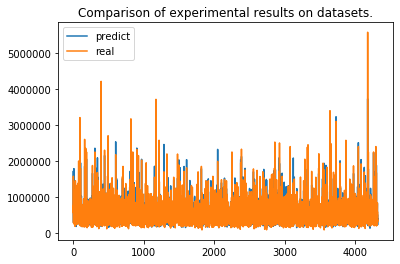

In [94]:
plt.title('Comparison of experimental results on datasets.')
plt.plot(pred, label='predict')
plt.plot(np.array(y_test), label='real')
plt.legend()

## Adaboost regression

### Learning Curve

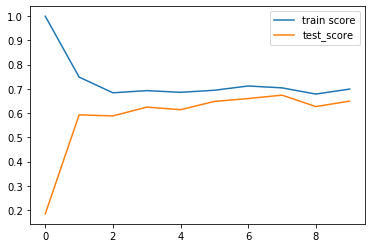

In [95]:
adab = AdaBoostRegressor(n_estimators=10)
train_sizes, train_scores, test_scores  = learning_curve(adab, data, price, cv=2, train_sizes=np.linspace(0.001, 1, 10))

plt.plot(train_scores[:, 0], label='train score')
plt.plot(test_scores[:, 0], label='test_score')
plt.legend()

From the learning curve, the fitting effect is good, but from the training score and test score, the performance of the model is too poor. Next, I will optimize the super parameters through grid search to improve the performance of the model.

### Train the model with data processed based on correlation.

In [96]:
adab = AdaBoostRegressor(n_estimators=10)

x_train, x_test, y_train, y_test = train_test_split(data, price, test_size=0.2, random_state=0)

adab.fit(x_train, y_train)
pred = adab.predict(x_test)

mse = mean_squared_error(pred, y_test)
_rmse = rmse(mse)
r2 = r2_score(y_test, pred)

print("The AdaBoostRegressor prediction MSE: %f, RMSE: %f, R2_score: %f" % (mse, _rmse, r2))

The AdaBoostRegressor prediction MSE: 47711882122.219498, RMSE: 218430.497235, R2_score: 0.598804


Compared with random forest regression, although the number of evaluators is 10, AdaBoost's regression effect is far worse than random forest regression. Next, use grid search to try other super parameters.

### Grid search for Adaboost to find best n_estimators

In [97]:
x_train, x_test, y_train, y_test = train_test_split(data, price, test_size=0.2, random_state=0)

param_grid = [{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}]

adab = AdaBoostRegressor()
grid_search = GridSearchCV(adab, param_grid, cv=2,
                           return_train_score=True,
                           n_jobs=-1)

grid_search.fit(x_train, y_train)
pred = grid_search.predict(x_test)
adab_mse = mean_squared_error(pred, y_test)
adab_rmse = rmse(adab_mse)
adab_r2 = r2_score(y_test, pred)

print("The best alpha:", grid_search.best_params_)
print("The AdaBoostRegressor prediction MSE: %f, RMSE: %f, R2_score: %f" % (adab_mse, adab_rmse, adab_r2))

The best alpha: {'n_estimators': 10}
The AdaBoostRegressor prediction MSE: 50151296386.971298, RMSE: 223944.851218, R2_score: 0.578292


Through the results, we can see that although we try different estimators, the performance of the algorithm is still poor.

## GBRT regression


### Learning Curve


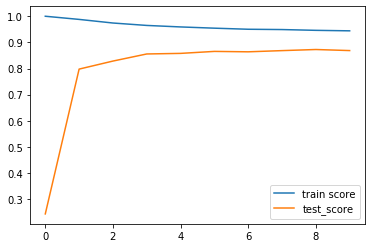

In [98]:
gbrt = GradientBoostingRegressor(n_estimators=500)
train_sizes, train_scores, test_scores  = learning_curve(gbrt, data, price, cv=2, train_sizes=np.linspace(0.001, 1, 10))

plt.plot(train_scores[:, 0], label='train score')
plt.plot(test_scores[:, 0], label='test_score')
plt.legend()

The number of evaluators is set to 500 directly here. It can be seen from the learning curve that the effect is very good. The score of the model is close to 0.9.

### Train the model with data processed based on correlation.

In [99]:
gbrt = GradientBoostingRegressor(n_estimators=10)
x_train, x_test, y_train, y_test = train_test_split(data, price, test_size=0.2, random_state=0)

adab.fit(x_train, y_train)
pred = adab.predict(x_test)

mse = mean_squared_error(pred, y_test)
_rmse = rmse(mse)
r2 = r2_score(y_test, pred)

print("The GradientBoostingRegressor prediction MSE: %f, RMSE: %f, R2_score: %f" % (mse, _rmse, r2))

The GradientBoostingRegressor prediction MSE: 136510077005.234131, RMSE: 369472.701299, R2_score: -0.147874


When the number of estimators is 10, the R2 score of the model is only 0.18, which must be caused by the unreasonable setting of super parameters. Next, we will search for the most super parameters through grid search.

### Grid search for GradientBoostingRegressor to find best n_estimators

In [100]:
x_train, x_test, y_train, y_test = train_test_split(data, price, test_size=0.2, random_state=0)

param_grid = [{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 300, 400, 500]}]

gbrt = GradientBoostingRegressor()
grid_search = GridSearchCV(gbrt, param_grid, cv=2,
                           return_train_score=True,
                           n_jobs=-1)

grid_search.fit(x_train, y_train)
pred = grid_search.predict(x_test)
adab_mse = mean_squared_error(pred, y_test)
adab_rmse = rmse(adab_mse)
adab_r2 = r2_score(y_test, pred)

print("The best alpha:", grid_search.best_params_)
print("The GradientBoostingRegressor prediction MSE: %f, RMSE: %f, R2_score: %f" % (adab_mse, adab_rmse, adab_r2))

The best alpha: {'n_estimators': 500}
The GradientBoostingRegressor prediction MSE: 12936996219.794054, RMSE: 113740.917087, R2_score: 0.891217


It can be seen that when the estimator is 500, the highest value of the model is 0.891133, which is also the best result at present. At this time, the performance boundary of the model may not be reached. Next, continue to increase the number of estimators.

In [101]:
x_train, x_test, y_train, y_test = train_test_split(data, price, test_size=0.2, random_state=0)

param_grid = [{'n_estimators': [500, 600, 700, 800, 900, 1000]}]

gbrt = GradientBoostingRegressor()
grid_search = GridSearchCV(gbrt, param_grid, cv=2,
                           return_train_score=True,
                           n_jobs=-1)

grid_search.fit(x_train, y_train)
pred = grid_search.predict(x_test)
adab_mse = mean_squared_error(pred, y_test)
adab_rmse = rmse(adab_mse)
adab_r2 = r2_score(y_test, pred)

print("The best alpha:", grid_search.best_params_)
print("The GradientBoostingRegressor prediction MSE: %f, RMSE: %f, R2_score: %f" % (adab_mse, adab_rmse, adab_r2))

The best alpha: {'n_estimators': 1000}
The GradientBoostingRegressor prediction MSE: 12911508520.704630, RMSE: 113628.819059, R2_score: 0.891431


It can be seen that when the number of estimators is 1000, the maximum performance of the model is 0.891181. Although the result is the best, the performance of the program should also be considered at this time.

### Visualization of results

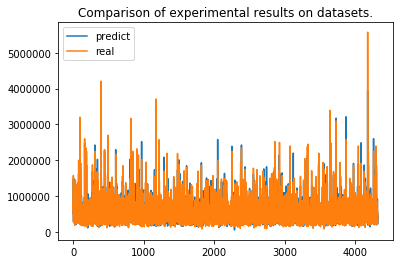

In [102]:
plt.title('Comparison of experimental results on datasets.')
plt.plot(pred, label='predict')
plt.plot(np.array(y_test), label='real')
plt.legend()

## Result analysis

In the experiment, six regression algorithms are used, namely linear expression, ridge expression, neural network algorithm, random forest regression, AdaBoost expression, gbrt expression. Each of these six algorithms has its advantages and disadvantages. Next, we will analyze the differences between them through the results.

Three different indexes were used in the experiment, namely MSE, RMSE and R2_score. For MSE and RMSE, the smaller the value is, the better the regression effect is. For R2_score, the larger the value is, the better the effect is.

The experimental results of the three algorithms are as follows,


The LinearRegression prediction MSE: 36214088766.726097, RMSE: 190299.996760, R2_score: 0.695486

The RidgeRegression prediction MSE: 36213780372.257034, RMSE: 190299.186473, R2_score: 0.695489

The NeuralNetworkRegression prediction MSE: 28591350431.685452, RMSE: 169089.770334, R2_score: 0.759584

The AdaBoostRegressor prediction MSE: 48640018298.974007, RMSE: 220544.821519, R2_score: 0.611000

The RandomForestRegressorprediction MSE: 14704301233.631662, RMSE: 121261.293221, R2_score: 0.876356    300

The GradientBoostingRegressor prediction MSE: 12893883485.030855, RMSE: 113551.237268, R2_score: 0.891579 1000


These six methods can be divided into three categories. One is common linear regression algorithm, including linear regression and ridge regression. They all use linear model to fit data. The fitting ability of the model is relatively poor, which is suitable for the case of linear distribution of data. The second kind of algorithm is neural network algorithm, which is a non-linear model, usually can fit various forms of data, but the performance of the model is closely related to the network structure and is not easy to debug. The third kind of algorithm is the integration algorithm. They integrate these simple algorithms to provide the final results for the model by including many basic regressors, including gbrt expression, AdaBoost expression and random forest regression.

The algorithm with the best performance is GradientBoosting regression, followed by random ForestRegression regression, and the algorithm with the worst performance is AdaBoostRegressor. The GradientBoosting regression algorithm needs 1000 basic regressors to achieve this effect, while the RandomForestRegressor reduction only needs 300 basic regressors to achieve the same performance as the GradientBoosting regression. Generally speaking, the RandomForestRegressor reduction is better.

Unexpectedly, AdaBoost regressor's R2 score is only 0.59, which is the worst among these algorithms, lower than the R2 score of linear regression. During training, it is found that adding more regressors seems to have little effect on AdaBoost regressor.

# Conclusion

In this experiment, I used six different algorithms to train the house price data. Through this experiment, we deepen the understanding of the algorithm and improve the programming ability. I think the best way to learn machine learning is to do programming experiments in person, so that we can not only master and use algorithms better, but also be familiar with the whole process of machine learning. In the following study, I will continue to study the theoretical knowledge in depth and try to use the program to realize the theory.